

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Exam version A
 
( 31st of October, 2018 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Please read the exercices carefully, write the necesary code and respond to all the questions. The code needs to be properly commented.


## Exercise 1 (4 points)

** (a) (0.5 point)** - Load the video images in 'Funnyrubbits' folder. Plot the first, the last and the middle images from the video. 
 
<img src="imagestext/ex1.png" width="600" height="180">

<IPython.core.display.Javascript object>


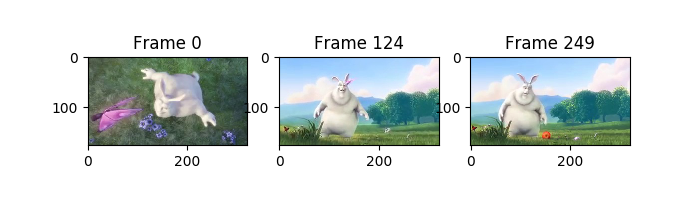

In [1]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import color
import math

# Load animation frames
ic = io.ImageCollection('Funnyrubbits/*.jpg')

import matplotlib.animation as animation
%matplotlib nbagg 

# Show frames
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(7,2))

axarr[0].imshow(ic[0])
axarr[0].set_title("Frame 0")

axarr[1].imshow(ic[math.floor((len(ic) - 1) / 2)])
axarr[1].set_title("Frame " + str(math.floor((len(ic) - 1) / 2)))

axarr[2].imshow(ic[len(ic) - 1])
axarr[2].set_title("Frame " + str(len(ic) - 1))

plt.show()

------------------------------------------------------------------------------------------------------


** (b) (2.5point) **- Find where a shot (scene) finishes and the following starts (boundaries). To solve this exercise, you need to create a **temporal plot** showing the different of histograms frame by frame and determine visually the threshold from the graphics. **The use of FuncAnimation function is optional.**

<img src="imagestext/temporal_histogram.png" width="600" height="180">


<IPython.core.display.Javascript object>


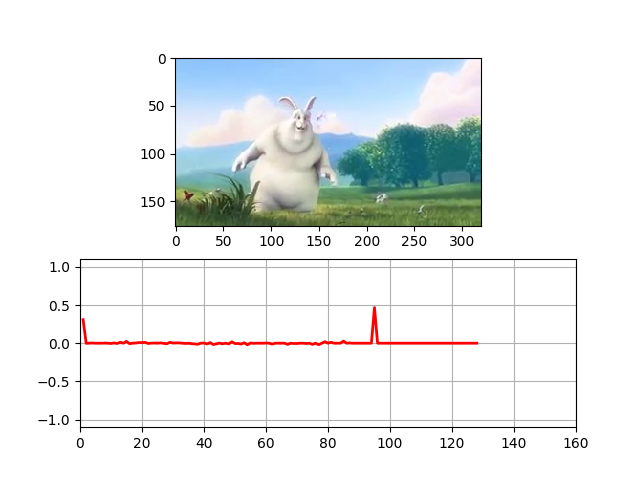

In [2]:
def data_gen():
    """
    Generator that will return the mean difference
    between the current and previous frames
    """
    t = data_gen.t
    
    cnt = 1
    while cnt < len(ic):
        
        # Obtain current frame and transform into float grayscale image
        current_frame = color.rgb2gray(skimage.img_as_float(ic[cnt]))
        
        # Obtain last frame and transform into float grayscale image.
        # In case it's the first frame, compare against a black frame
        previous_frame = color.rgb2gray(skimage.img_as_float(ic[cnt - 1])) if t is not 0 else np.zeros(current_frame.shape)

        # Substract previous frame from current frame to get matrix of
        # change. This can be interpreted as the derivative of each pixel
        # relative to time.
        diff = current_frame - previous_frame
        
        # Find the mean of the differences matrix.
        y = np.mean(diff)

        cnt += 1
        t += 1
        
        yield t, diff[0,0]

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot function in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=30, repeat=False)
plt.show()

In [4]:
# Get list of frame differences
difference_means = list(data_gen())

threshold = .1

# Get list of cut frames
cuts = []
for shot in difference_means:
    
    # If the median difference is considerable,
    # treat as new shot.
    if shot[1] > threshold:
        cuts.append(shot[0])

# Generate list of short start and end frames
# in the form (cut frame, frame before next cut)
shots = []
i = 0
while i < len(cuts) - 1:
    c = cuts[i]
    shots.append((cuts[i], cuts[i + 1] - 1))
    i += 1
    
shots.append((cuts[i], len(ic) - 1))

print(shots)

[(1, 94), (95, 249)]


Observing the graph, **I have defined the threshold at which to consider a scene cut at 0.1**.
As we can see in the results of the above code, **the video has 2 scenes comprised in the frame ranges:**
- (1, 94)
- (95, 249)

------------------------------------------------------------------------------------------------------

**(c) (1 points)** Show the initial and final images of each shot extracted as follows:

<img src="imagestext/ex2.png" width="600" height="180">

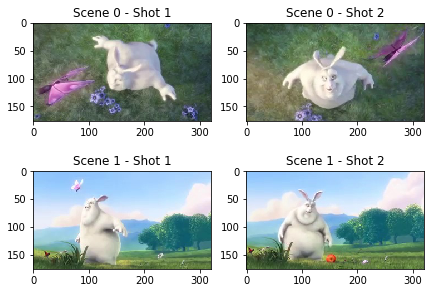

In [5]:
%matplotlib inline

# Show frames
f, axarr = plt.subplots(ncols=2, nrows=len(shots),figsize=(7,5))

i = 0
for s in shots:
    start, end = s
    axarr[i, 0].imshow(ic[start])
    axarr[i, 0].set_title("Scene " + str(i) + " - Shot 1")
    axarr[i, 1].imshow(ic[end])
    axarr[i, 1].set_title("Scene " + str(i) + " - Shot 2")
    i += 1

plt.show()

------------------------------------------------------------------------------------------------------------

# Exercise 2 (4 points)

** (a) (2.5 points)** - Load the images `images/houseRGB.jpg` and `images/colour_splashesRGB.jpg` and insert the second image in the red region of the first one.  Use `masking` to select the red region in the house. Display the resulting images following the example blow.

Take into account that:
- Images type can change when using conversion functions.
- The size of the colour_splashes.png image is different from the zone where it has to be inserted into house.jpg

<img src="imagestext/ex5.png" width="1000" height="180">

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


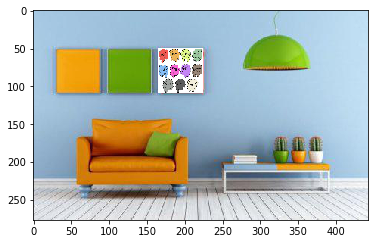

In [6]:
from skimage import transform

# Load images
house = io.imread('images/houseRGB.jpg')
splashes = io.imread('images/colour_splashesRGB.jpg')

# Convert houseRGB.jpg to float
house = skimage.img_as_float(house)

# Set boundaries and size of the area we want to display splashes.jpg on
red_area_boundaries = ((50, 110), (165, 225))
red_area_size = (red_area_boundaries[0][1] 
                 - red_area_boundaries[0][0], red_area_boundaries[1][1] - red_area_boundaries[1][0])

# Resize splashes.jpg to fit into area
splashes_resized = transform.resize(splashes, red_area_size, mode='reflect')
plt.imshow(splashes_resized)

# Substitute pixels in area by splashes
house[red_area_boundaries[0][0]:red_area_boundaries[0][1], 
       red_area_boundaries[1][0]:red_area_boundaries[1][1]] = splashes_resized

# Show result
plt.imshow(house)
plt.show()

------------------------------------------------------------------------------------------------------------

** (b) (1 point)** - Plot the R, G and B histograms of the following images using 16 bins:

    1) Splashes image.
    2) Resized splashes image.

/usr/local/lib/python3.5/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


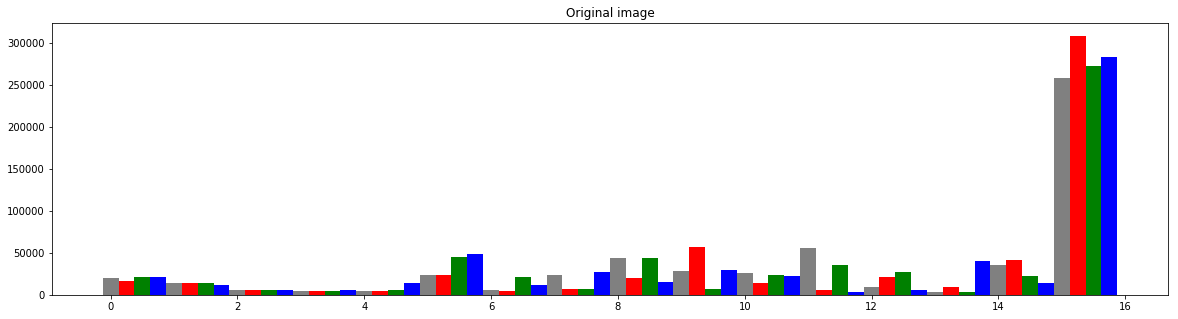

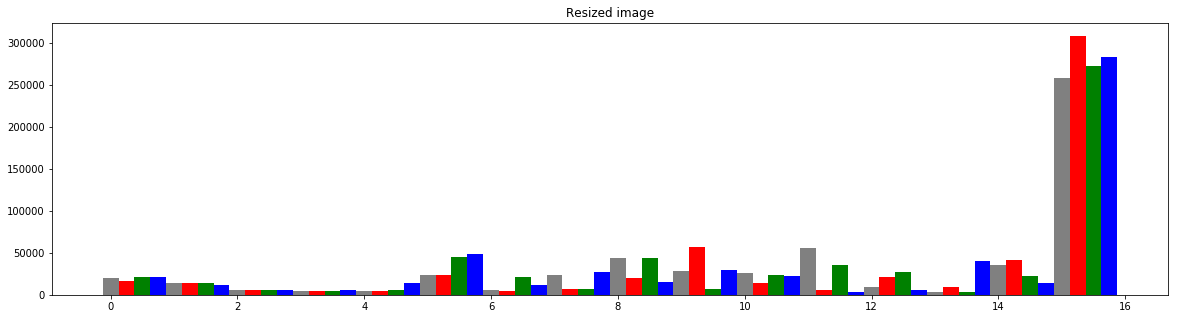

In [7]:
def show_histogram(img, nbins, title = None):
    """
    Display histogram graph for the gray, R, G, B channels of the specified image in (nbins) intervals.
    img:      Image to display histogram of.
    nbins:    Intervals of the histogram.
    """
    
    # Change image values to float in order to define custom nbins
    img = img.astype(float)
    
    # Generate a histogram of our image. We use the ravel() function to transform the original array into a vector
    histogram = skimage.exposure.histogram(img, nbins = nbins)

    # Generate bar graph
    fig = plt.figure(figsize = (20, 5))
    ax = fig.add_subplot(111)

    # Specify bar width and range of X values
    # histogram[1] contains the values of the bins - therefore our X axis is in the range (0, len(histogram[1]))
    num_bars = img.shape[2] if len(img.shape) == 3 else 1
    width = 1 / (num_bars + 1)
    x_range = np.arange(len(histogram[1]))
    
    # Retrieve histogram values for the gray channel in nbins intervals
    # histogram[0] contains the Y value for each bin.
    values = skimage.exposure.histogram(color.rgb2gray(img), nbins = nbins)[0]
    
    # Create bar graph
    rects = ax.bar(x_range, values, width, color='gray')
    
    if len(img.shape) == 3:
        
        # In case image has color channels, retrieve histogram data for 
        # each and add to displayed graph.
        
        r_values = skimage.exposure.histogram(img[:,:,0], nbins = nbins)[0]
        g_values = skimage.exposure.histogram(img[:,:,1], nbins = nbins)[0]
        b_values = skimage.exposure.histogram(img[:,:,2], nbins = nbins)[0]
        
        r_rects = ax.bar(x_range + width * 1, r_values, width, color='r')
        g_rects = ax.bar(x_range + width * 2, g_values, width, color='g')
        b_rects = ax.bar(x_range + width * 3, b_values, width, color='b')
    
    # 'title' parameter is optional. In case it has been defined, display above graph
    if title is not None: 
        ax.set_title(title)
        
    plt.show()
    
show_histogram(splashes, 16, "Original image")
show_histogram(splashes, 16, "Resized image")

------------------------------------------------------------------------------------------------------------

** (c) (0.5 point)** - Why do the histograms of both images slighty differ?

Although the content of both the original and resized images are virtually the same, when computing the histogram, we **have fewer values to sample from in the resized image**. This means that subtle changes in color are lost to more prevalent colors. Although this change might be almost unappreciable, the resulting histograms are different.

# Exercise 3 (2 points)

Load the noisy image in `robot_face.jpg`, modify the given filter (fill the blank '_' spaces) in order to apply a smoothing and apply it on the loaded RGB image. Show the original image and the smoothed one after noise removal.

<img src="imagestext/ex5_smoothed.png" width="400" height="100">

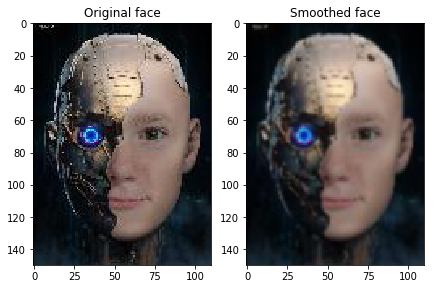

In [8]:
from scipy import ndimage

def convolve_RGB(img, mask):
    """
    Convolve an RGB image using the specified mask.
    """
    
    result = img.copy()
    
    # Convolve all color channels individually
    for i in range(3):
        ndimage.convolve(img[:,:,i], mask, output = result[:,:,i])
    
    return result

filter_kernel = [[1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]]

# Normalize convolution mask
filter_kernel = filter_kernel / np.sum(filter_kernel)

robot_face = io.imread('images/robot_face.jpg')
robot_face_smooth = convolve_RGB(robot_face, filter_kernel)

# Show result
f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(7,5))
axarr[0].imshow(robot_face)
axarr[0].set_title("Original face")
axarr[1].imshow(robot_face_smooth)
axarr[1].set_title("Smoothed face")
plt.show()

**The defined filter is effectively a Gaussian filter:** it convolves the image using a weighted average of the neighboring pixels using a normal distribution. This results in a smooth blur effect, the magnitude of which depends on the size of the mask.